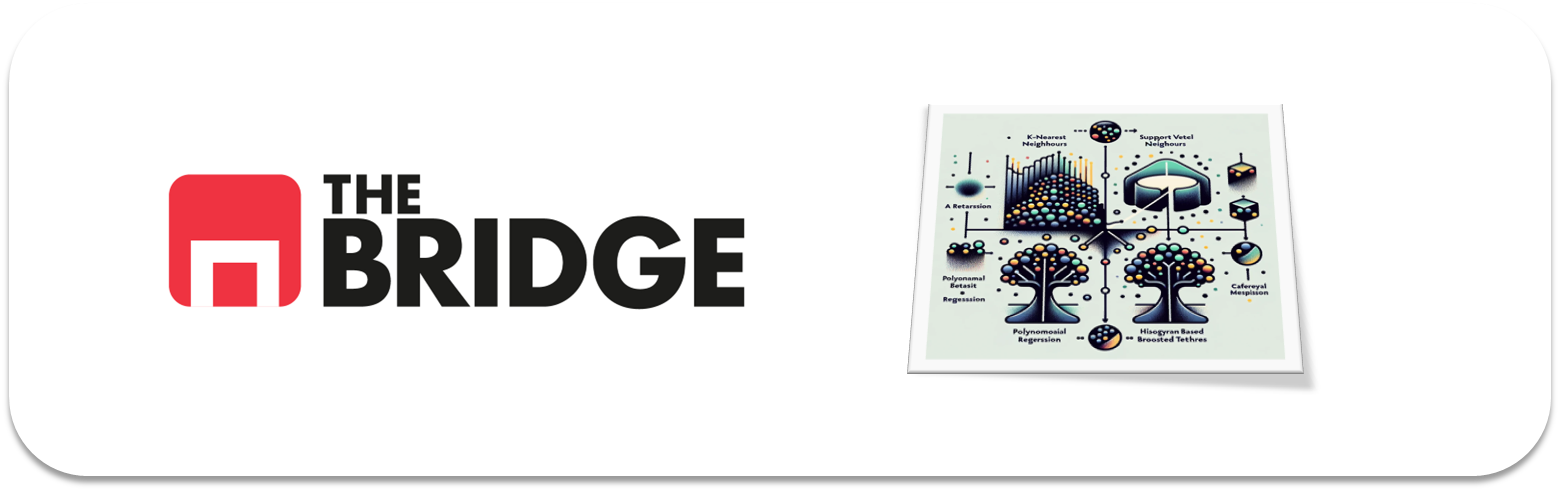

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, make_scorer, recall_score

import matplotlib.pyplot as plt

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [2]:
dataset = pd.read_csv("./data/credit_npo.csv")
dataset

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


In [3]:
dataset.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


In [4]:
#Comprobamos si hay NA en alguna columna
dataset.isna().sum()

SeriousDlqin2yrs                          0
RevolvingUtilizationOfUnsecuredLines      0
age                                       0
NumberOfTime30-59DaysPastDueNotWorse      0
DebtRatio                                 0
MonthlyIncome                           721
NumberOfOpenCreditLinesAndLoans           0
NumberOfTimes90DaysLate                   0
NumberRealEstateLoansOrLines              0
NumberOfTime60-89DaysPastDueNotWorse      0
NumberOfDependents                      177
dtype: int64

In [5]:
#Hay columnas con NA. Vamos a aprovechar KNN para rellenar los valores
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

dataset.isna().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

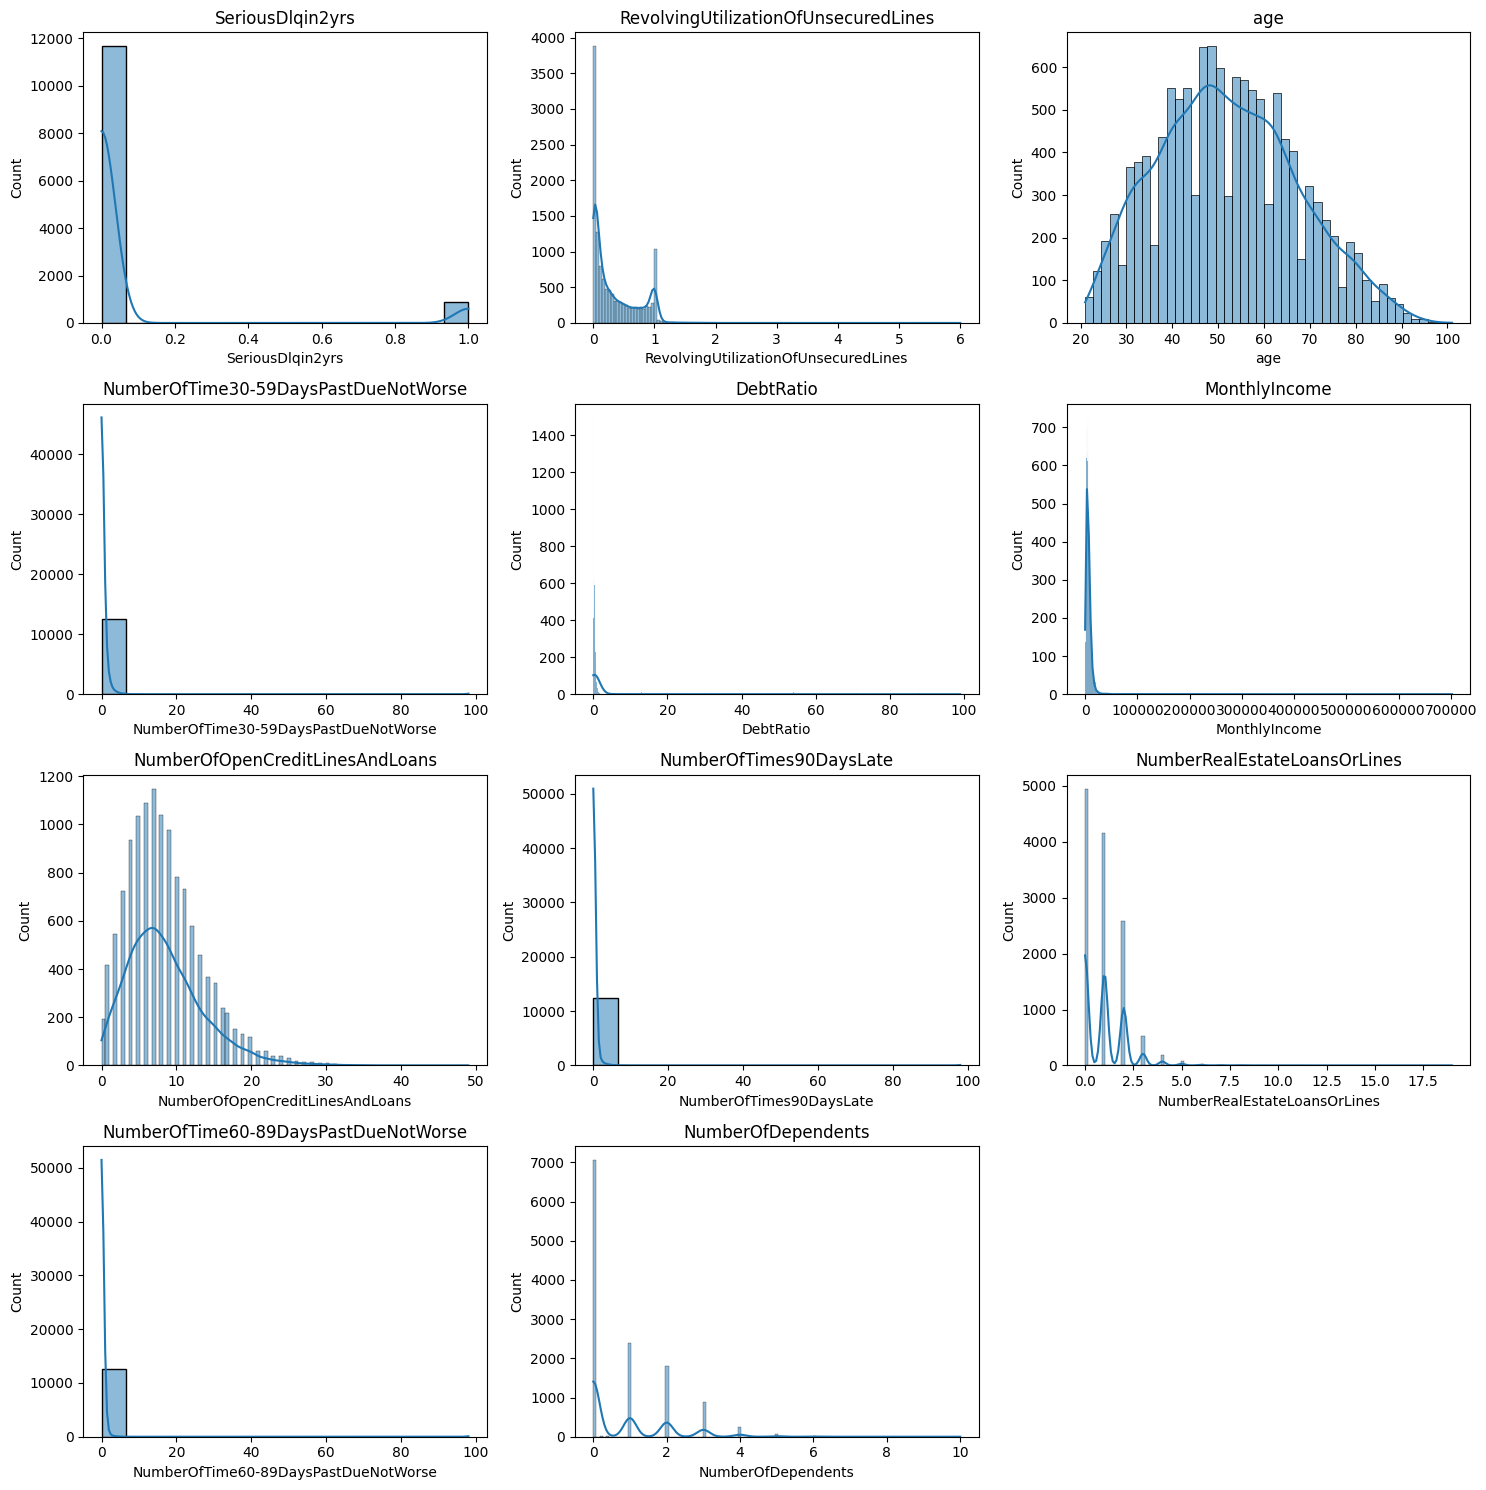

In [6]:
num_cols = 3
num_rows = int(np.ceil(len(dataset.columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(dataset.columns):
    sns.histplot(dataset[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

Por la distribución que presenta la columna "SeriousDlqin2years", esta será la variable a predecir. Es binaria, por lo que es un problema de clasificación.   
Todas las demás variables son numéricas. Algunas continuas y otras discretas. Muchas columnas presentan outliers, pues tienen valores máximos muy superiores a la media.   
Se procede a representarlos

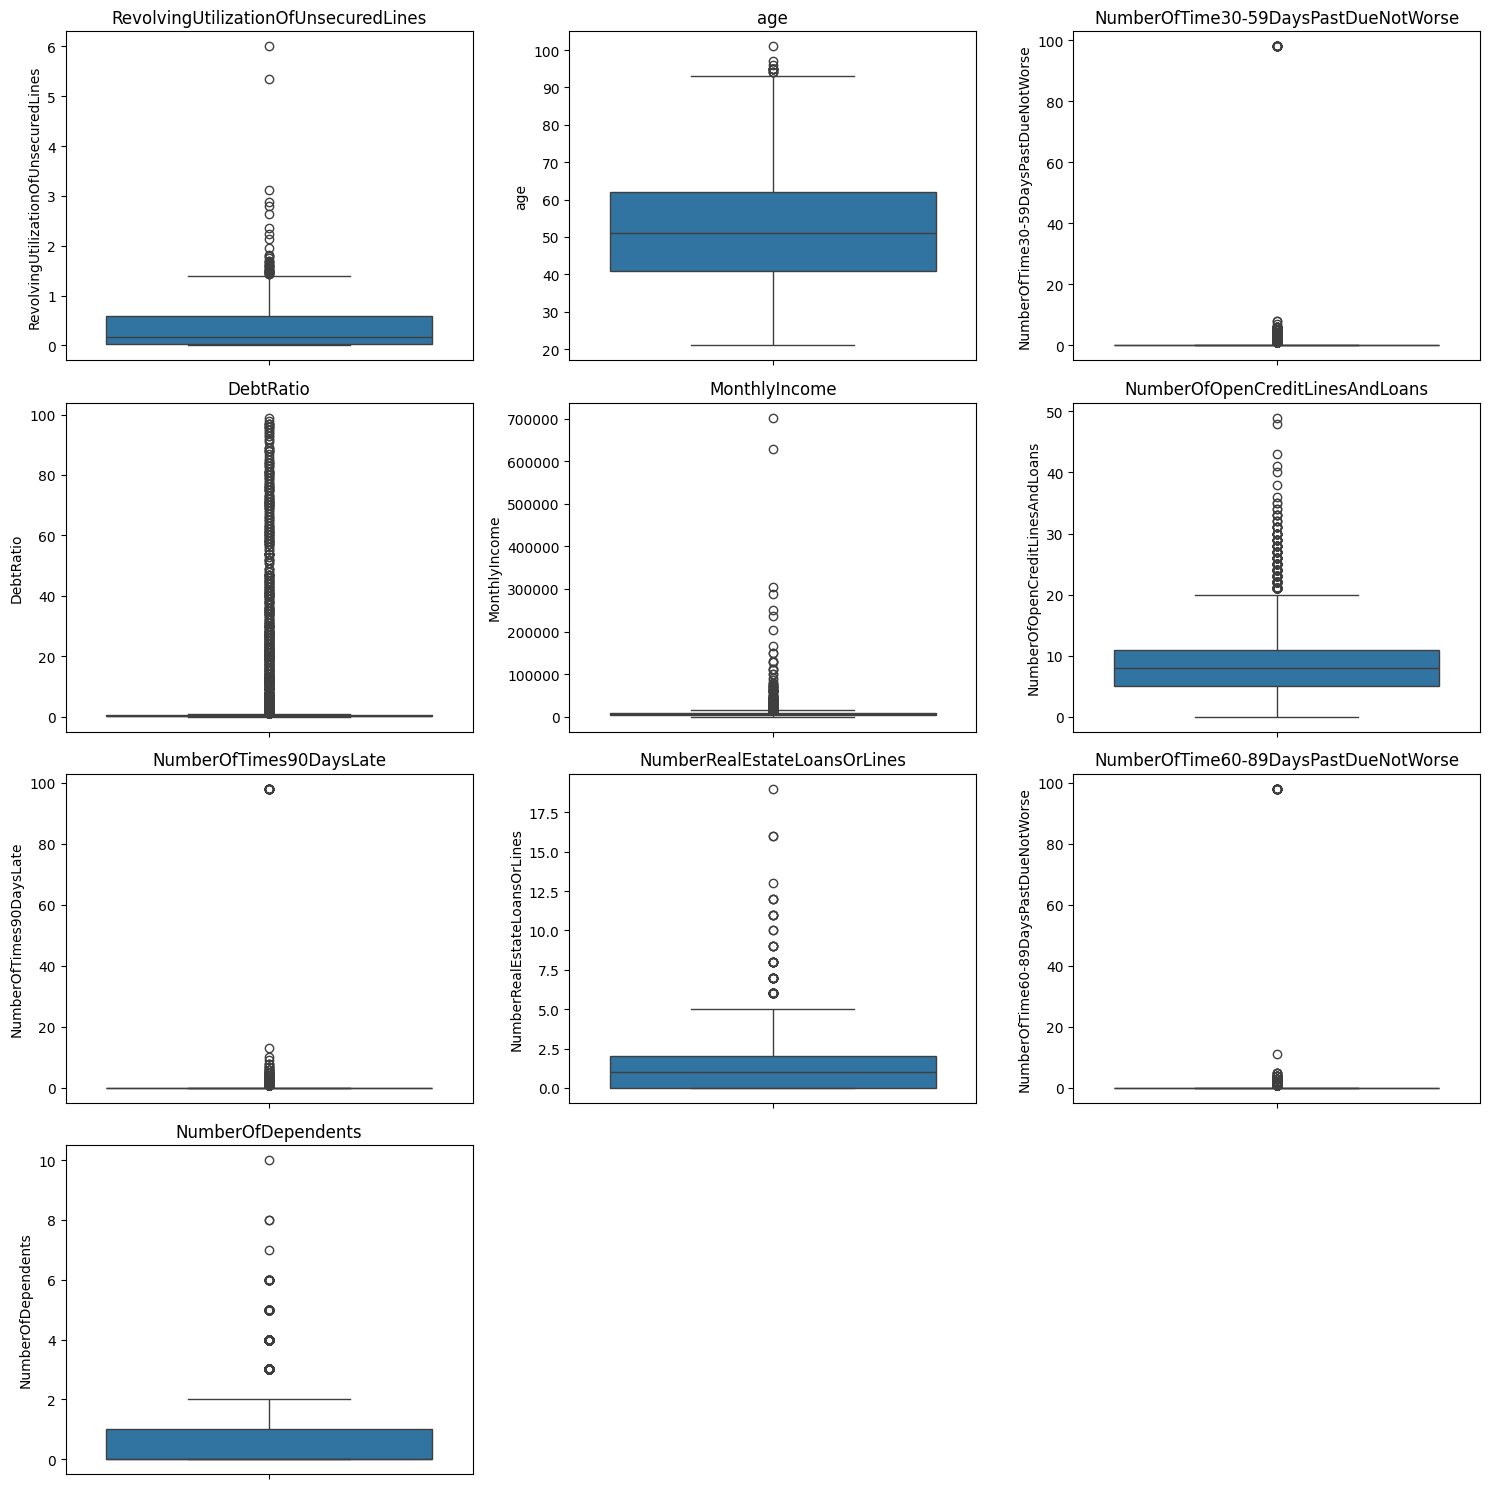

In [7]:
num_cols = 3
num_rows = int(np.ceil((len(dataset.columns) - 1) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(dataset.columns[1:]):
    sns.boxplot(y=dataset[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

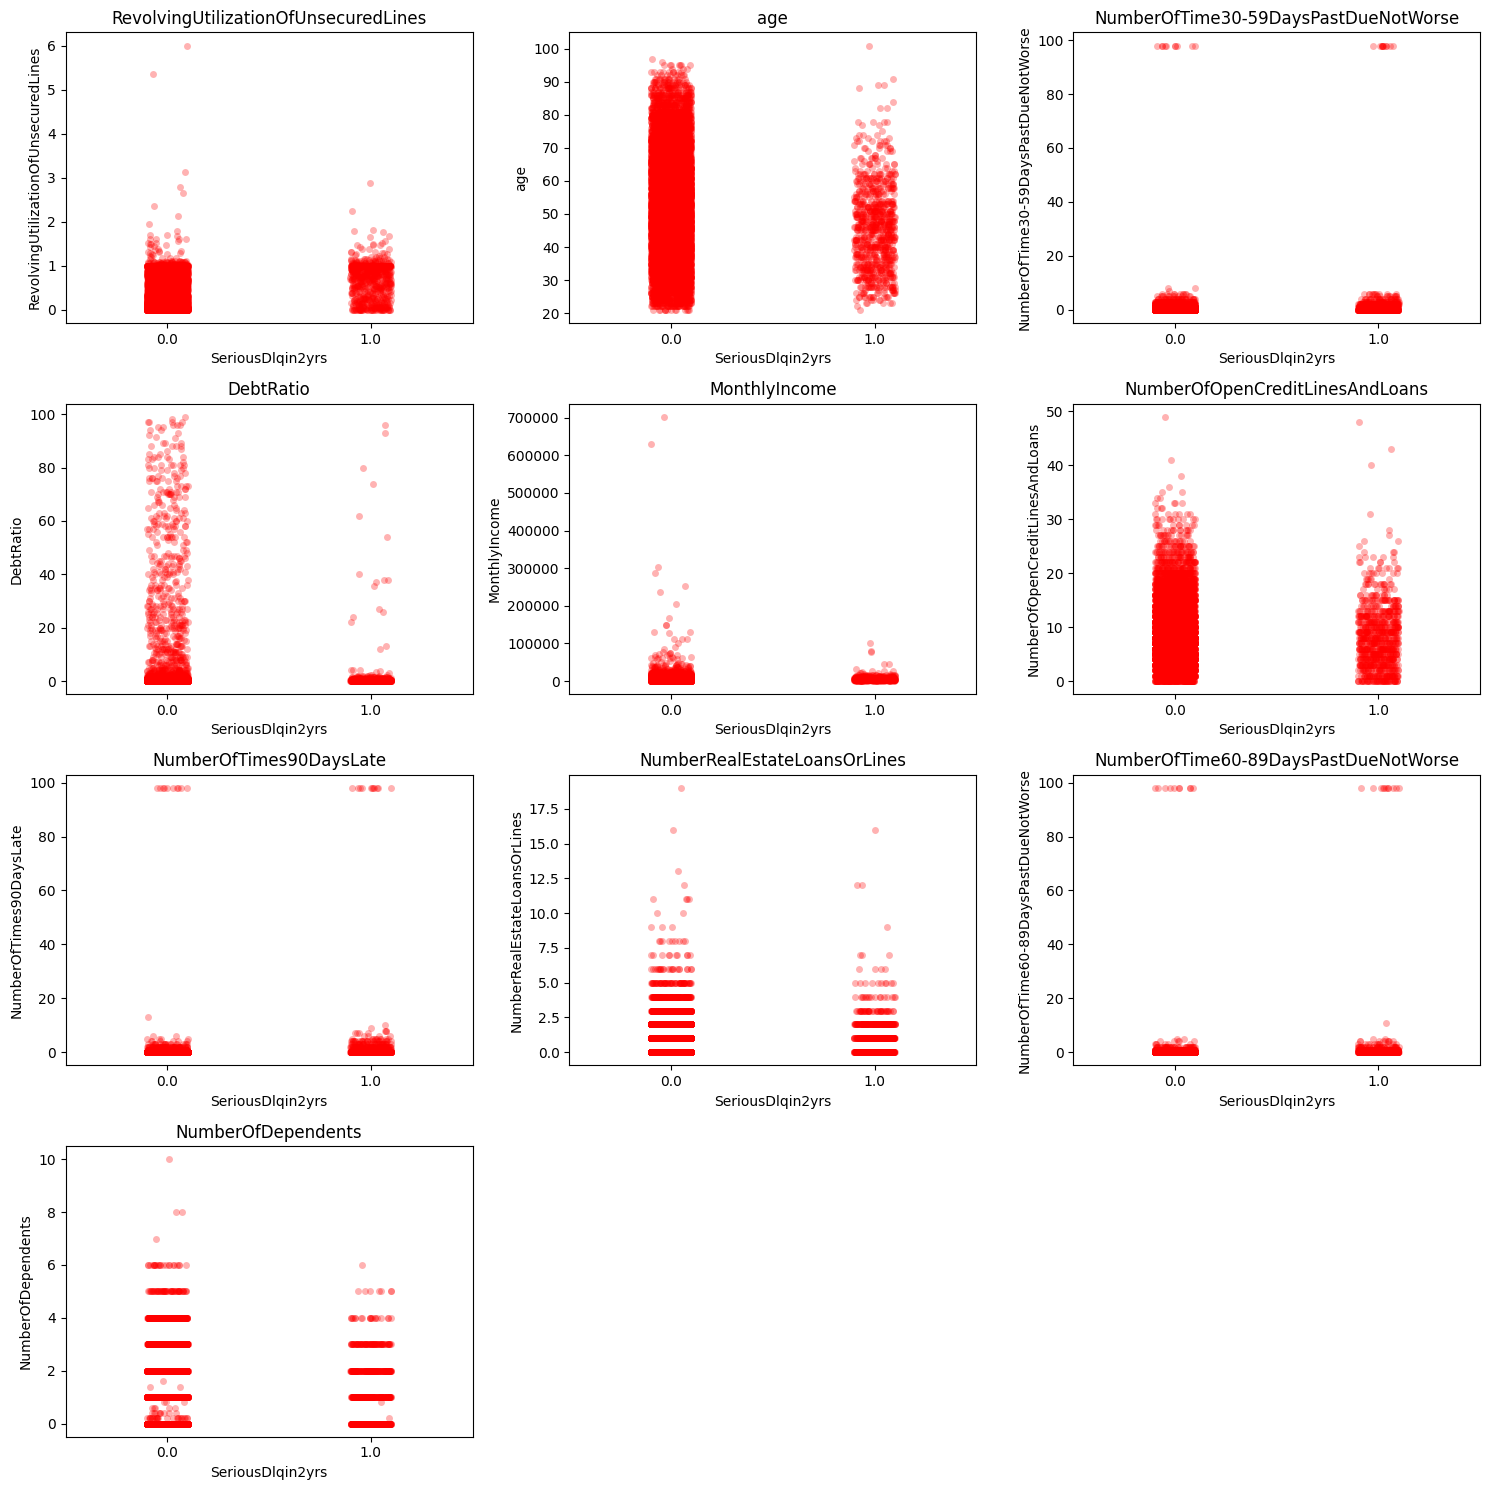

In [8]:
num_cols = 3
num_rows = int(np.ceil((len(dataset.columns) - 1) / num_cols))


fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(dataset.columns[1:]):
    
    sns.stripplot(x='SeriousDlqin2yrs', y=col, data=dataset, ax=axes[i], color='red', alpha=0.3)
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

De acuerdo a los gráficos anteriores, los outliers aparecen tanto para cuando la variable target es positiva y para cuando es negativa. Dado que es un problema de clasificación, se va a proceder a mantenerlos

### #1.3
Pinta la distribución de frecuencias del target y coméntala

<Axes: xlabel='SeriousDlqin2yrs'>

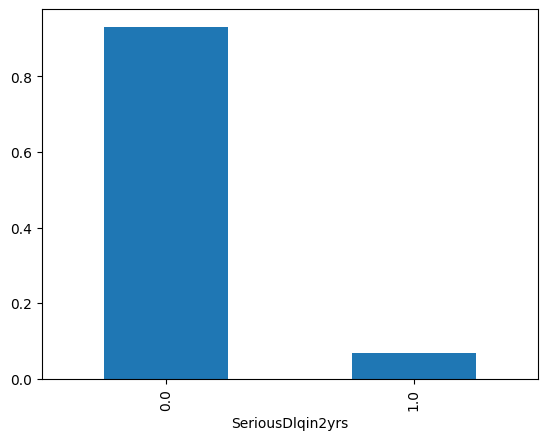

In [9]:
dataset.iloc[:,0].value_counts(True).plot(kind="bar")

In [10]:
dataset.iloc[:,0].value_counts(True)

SeriousDlqin2yrs
0.0    0.931084
1.0    0.068916
Name: proportion, dtype: float64

La variable target está muy desbalanceada, pues la clase positiva representa menos del 7% de los datos. Es recomendable eliminar datos de la clase negativa o hacer oversampling para equilibrar el dataset

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [11]:
X = dataset.drop("SeriousDlqin2yrs", axis = 1)
y = dataset.SeriousDlqin2yrs

Para casos de detección de anomalías, como fraude o impagos, `MinMaxScaler` puede ser más adecuado en un problema de clasifdicación, ya que escala los datos a un rango específico (por ejemplo, entre 0 y 1), lo que puede ayudar a resaltar las anomalías. Puede sernos más útil al tener los outliers antes mencionados



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Antes de pasar a crear modelos, vamos a hacer un oversampling usando SMOTE

In [13]:
smote = SMOTE(sampling_strategy="minority", k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [14]:
y_train_resampled.value_counts()

SeriousDlqin2yrs
0.0    9328
1.0    9328
Name: count, dtype: int64

Vamos a generar tres modelos sin optimizar los parametros a ver que resultados iniciales se obtienen. AL mismo tiempo, se van a generar 3 variantes:

1. Para ver qué resultados se obtienen si se usa como métrica el área bajo la curva (AUC)
2. Para ver qué resultados se obtienen si se usa como métrica el recall
3. Igual que la anterior pero sin hacer oversampling

In [15]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

xgb_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
}

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced"]
}

scorer = make_scorer(recall_score, average='macro')

knn_model = KNeighborsClassifier()
xgb_model = xgboost.XGBClassifier(eval_metric="auc")
rf_model = RandomForestClassifier(random_state=42)

knn_grid = GridSearchCV(knn_model, knn_params, scoring="roc_auc", cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring="roc_auc", cv=5, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, rf_params, scoring="roc_auc", cv=5, n_jobs=-1)

knn_grid.fit(X_train_resampled, y_train_resampled)
xgb_grid.fit(X_train_resampled, y_train_resampled)
rf_grid.fit(X_train_resampled, y_train_resampled)

best_knn = knn_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_
best_rf = rf_grid.best_estimator_

knn_pred = best_knn.predict(X_test)
xgb_pred = best_xgb.predict(X_test)
rf_pred = best_rf.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

print("RandomForest Classification Report:")
print(classification_report(y_test, rf_pred))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.87      0.91      2345
         1.0       0.18      0.39      0.24       163

    accuracy                           0.84      2508
   macro avg       0.56      0.63      0.58      2508
weighted avg       0.90      0.84      0.87      2508

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2345
         1.0       0.48      0.31      0.37       163

    accuracy                           0.93      2508
   macro avg       0.71      0.64      0.67      2508
weighted avg       0.92      0.93      0.93      2508

RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      2345
         1.0       0.45      0.32      0.37       163

    accuracy                           0.93      2508
   macro avg       0.70      0.65 

In [16]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

xgb_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
}

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced"]
}

scorer = make_scorer(recall_score, average='macro')


knn_model = KNeighborsClassifier()
xgb_model = xgboost.XGBClassifier(tree_method="hist", device="cuda")
rf_model = RandomForestClassifier()

knn_grid = GridSearchCV(knn_model, knn_params, scoring=scorer, cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring=scorer, cv=5, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, rf_params, scoring=scorer, cv=5, n_jobs=-1)

knn_grid.fit(X_train_resampled, y_train_resampled)
xgb_grid.fit(X_train_resampled, y_train_resampled)
rf_grid.fit(X_train_resampled, y_train_resampled)

best_knn = knn_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_
best_rf = rf_grid.best_estimator_

knn_pred = best_knn.predict(X_test)
xgb_pred = best_xgb.predict(X_test)
rf_pred = best_rf.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

print("RandomForest Classification Report:")
print(classification_report(y_test, rf_pred))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      2345
         1.0       0.18      0.27      0.22       163

    accuracy                           0.87      2508
   macro avg       0.56      0.59      0.57      2508
weighted avg       0.90      0.87      0.88      2508

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      2345
         1.0       0.43      0.28      0.34       163

    accuracy                           0.93      2508
   macro avg       0.69      0.63      0.65      2508
weighted avg       0.92      0.93      0.92      2508

RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      2345
         1.0       0.47      0.33      0.38       163

    accuracy                           0.93      2508
   macro avg       0.71      0.65 

c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:40:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [17]:
knn_params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

xgb_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "scale_pos_weight": [dataset.iloc[:,0].value_counts()[0] / dataset.iloc[:,0].value_counts()[1]]
}

rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "class_weight": ["balanced"]
}

scorer = make_scorer(recall_score, average='macro')

knn_model = KNeighborsClassifier()
xgb_model = xgboost.XGBClassifier(tree_method="hist", device="cuda")
rf_model = RandomForestClassifier(random_state=42)

knn_grid = GridSearchCV(knn_model, knn_params, scoring=scorer, cv=5, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_model, xgb_params, scoring=scorer, cv=5, n_jobs=-1)
rf_grid = GridSearchCV(rf_model, rf_params, scoring=scorer, cv=5, n_jobs=-1)

knn_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

best_knn = knn_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_
best_rf = rf_grid.best_estimator_

knn_pred = best_knn.predict(X_test)
xgb_pred = best_xgb.predict(X_test)
rf_pred = best_rf.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))

print("RandomForest Classification Report:")
print(classification_report(y_test, rf_pred))

KNN Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2345
         1.0       0.41      0.09      0.14       163

    accuracy                           0.93      2508
   macro avg       0.68      0.54      0.55      2508
weighted avg       0.91      0.93      0.91      2508

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.81      0.88      2345
         1.0       0.20      0.71      0.32       163

    accuracy                           0.80      2508
   macro avg       0.59      0.76      0.60      2508
weighted avg       0.93      0.80      0.85      2508

RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2345
         1.0       0.27      0.52      0.36       163

    accuracy                           0.88      2508
   macro avg       0.62      0.71 

En cuanto a recall promedio, el mejor modelo es XGBoost sin utilizar SMOTE. Sin embargo, RandomForest tiene un recall promedio similar pero más accuracy.   
Se van a optimizar ambos para ver cual da un mejor modelo. Se va a utilizar el dataset sin SMOTE

In [18]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real

param_dist = {
    "n_estimators": Integer(50, 200),
    "max_depth": Integer(10, 50),
    "min_samples_split": Integer(2, 10),
    "min_samples_leaf": Integer(1, 4),
    "class_weight": ["balanced"]
}

scorer = make_scorer(recall_score, average='macro')

rf_model = RandomForestClassifier(random_state=42)

bayes_search = BayesSearchCV(
    estimator=rf_model,
    search_spaces=param_dist,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    n_iter=100,
    random_state=42
)

bayes_search.fit(X_train, y_train)

best_rf_bayes = bayes_search.best_estimator_

rf_bayes_pred = best_rf_bayes.predict(X_test)

print("Optimized RandomForest Classification Report:")
print(classification_report(y_test, rf_bayes_pred))

c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.str_('balanced'), np.int64(10), np.int64(4), np.int64(10), np.int64(51)] before, using random point ['balanced', np.int64(14), np.int64(1), np.int64(9), np.int64(193)]
  warnings.warn(


Optimized RandomForest Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      2345
         1.0       0.27      0.52      0.36       163

    accuracy                           0.88      2508
   macro avg       0.62      0.71      0.64      2508
weighted avg       0.92      0.88      0.89      2508



In [19]:
param_dist = {
    "n_estimators": Integer(50, 500),
    "max_depth": Integer(3, 10),
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "subsample": Real(0.6, 1.0),
    "colsample_bytree": Real(0.6, 1.0),
    "gamma": Real(0, 5),
    "scale_pos_weight": Real(1, 10)
}

scorer = make_scorer(recall_score, average='macro')

xgb_model = xgboost.XGBClassifier(tree_method="hist", device="cuda")

bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_dist,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    n_iter=200,
    random_state=42
)

bayes_search.fit(X_train, y_train)

best_xgb_bayes = bayes_search.best_estimator_

xgb_bayes_pred = best_xgb_bayes.predict(X_test)



c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\sergi\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [20]:
print("Optimized XGBoost Classification Report:")
print(classification_report(y_test, xgb_bayes_pred))

Optimized XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      2345
         1.0       0.23      0.64      0.34       163

    accuracy                           0.84      2508
   macro avg       0.60      0.75      0.63      2508
weighted avg       0.92      0.84      0.87      2508



Tras la optimización, el modelo RandomForest es bastante parecido al que se tenía anteriormente y el de XGBoost ha mejorado.
Dado que lo que se busca es el mejor modelo en cuanto al valor de recall, nos quedaríamos con XGBoost aunque tenga una precisión un 4% inferior